In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/index.csv')

In [ ]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
data.shape

(1133, 6)

In [ ]:
data.dtypes

,0
date,object
datetime,object
cash_type,object
card,object
money,float64
coffee_name,object


In [ ]:
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [ ]:
data.isnull()

,date,datetime,cash_type,card,money,coffee_name
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1128,False,False,False,False,False,False
1129,False,False,False,False,False,False
1130,False,False,False,False,False,False
1131,False,False,False,False,False,False


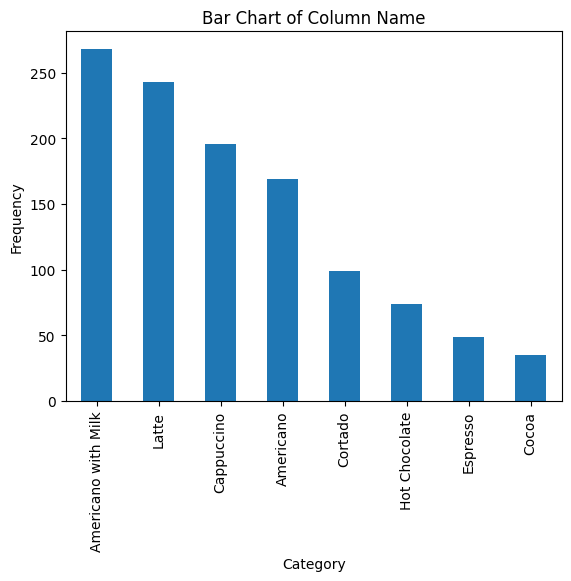

In [ ]:
data['coffee_name'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Chart of Column Name')
plt.show()

<Axes: >

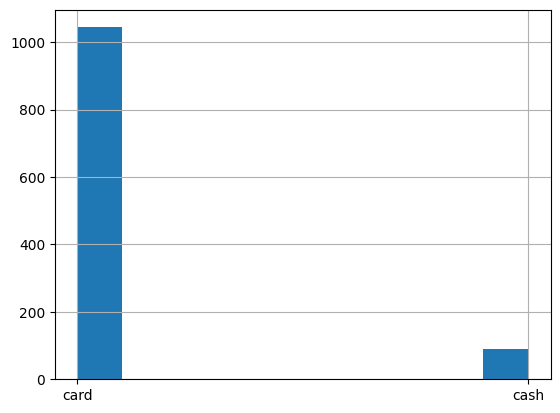

In [ ]:
data['cash_type'].hist()

In [ ]:
!pip install statsmodels==0.13.5 # Install statsmodels if not already installed

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [ ]:
sales_data = data['money']  # Replace 'Sales' with your sales column name

In [ ]:
train_data = sales_data[:-30]  # Use the last 30 days for testing
test_data = sales_data[-30:]

In [ ]:
# Example: ARIMA(5, 1, 0) - experiment with these values
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# For next day:
next_day_forecast = model_fit.predict(start=len(sales_data), end=len(sales_data))

# For next month (assuming daily data):
next_month_forecast = model_fit.predict(start=len(sales_data), end=len(sales_data) + 30)

# For next year (assuming daily data):
next_year_forecast = model_fit.predict(start=len(sales_data), end=len(sales_data) + 365)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
predictions = model_fit.predict(start=len(train_data), end=len(sales_data)-1)
# Calculate MSE first
mse = mean_squared_error(test_data, predictions)
# Then calculate RMSE manually by taking the square root of MSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)  # Lower RMSE indicates better accuracy

RMSE: 4.462498340398087


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns=['money'])

In [ ]:
y = data['money']

In [ ]:
# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
pd.DataFrame(data['coffee_name'].value_counts(normalize=
True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [ ]:
# Check if 'date' column exists in the DataFrame

data['datetime'] = pd.to_datetime(data['datetime'])
  # Create column of Month, Weekdays, and Hours
data['month'] = data['datetime'].dt.strftime('%m')
data['day'] = data['datetime'].dt.strftime('%w')
data['hour'] = data['datetime'].dt.strftime('%H')


In [ ]:
data['month']

,month
date,
2024-03-01,03
2024-03-01,03
2024-03-01,03
2024-03-01,03
2024-03-01,03
...,...
2024-07-31,07
2024-07-31,07
2024-07-31,07


In [ ]:
data['day']

,day
date,
2024-03-01,5
2024-03-01,5
2024-03-01,5
2024-03-01,5
2024-03-01,5
...,...
2024-07-31,3
2024-07-31,3
2024-07-31,3


In [ ]:
data['hour']

,hour
date,
2024-03-01,10
2024-03-01,12
2024-03-01,12
2024-03-01,13
2024-03-01,13
...,...
2024-07-31,20
2024-07-31,20
2024-07-31,21
